##Project Name : Melanoma Detection Assignment

##Problem statement:
# To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

##Steps in creating CNN Model

1. Data Reading/Data Understanding → Defining the path for train and test images
2. Dataset Creation→ Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.
3. Dataset visualisation → Create a code to visualize one instance of all the nine classes present in the dataset
4. Model Building & training : - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1). - Choose an appropriate optimiser and loss function for model training - Train the model for ~20 epochs - Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.
5. Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
6. Model Building & training on the augmented data :
   -Create a CNN model, which can accurately detect 9 classes present in the
     dataset. While building the model rescale images to normalize pixel values between (0,1).
   -Choose an appropriate optimiser and loss function for model training
   -Train the model for ~20 epochs
   -Write your findings after the model fit, see if the earlier issue is
     resolved or not?
7. Class distribution: Examine the current class distribution in the training dataset - Which class has the least number of samples? - Which classes dominate the data in terms of the proportionate number of samples?
8. Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.
9. Model Building & training on the rectified class imbalance data : - Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1). - Choose an appropriate optimiser and loss function for model training - Train the model for ~30 epochs - Write your findings after the model fit, see if the issues are resolved or not?



## Importing all the important *libraries*

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Dropout,  Flatten, BatchNormalization, Activation
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

##Importing Data

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')


In [ ]:
#Counting the number of images in both the directories
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [ ]:
def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df


,Class,No. of Image
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


##Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.


#Section 2:Dataset Creation - Create a dataset
Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180


In [ ]:
#Calling image_dataset_from_directory(main_directory, labels='inferred') will return a tf.data.Dataset that yields batches of images
#from the subdirectories class_a and class_b etc., together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).
#img_size below is the Size to resize images to after they are read from disk, specified as (height, width)
#batch_size is the size of the batches of data
#validation_split is Optional float between 0 and 1, fraction of data to reserve for validation.
#Seed is Optional random seed for shuffling and transformations.
#subset is Subset of the data to return. One of "training", "validation" or "both".
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="training",
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir_train,
    batch_size=batch_size,
    image_size=(img_height,img_width),
    seed=123,
    validation_split=0.2,
    subset="validation",
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Dataset visualisation - Visualize the data
Todo, create a code to visualize one instance of all the nine classes present in the dataset

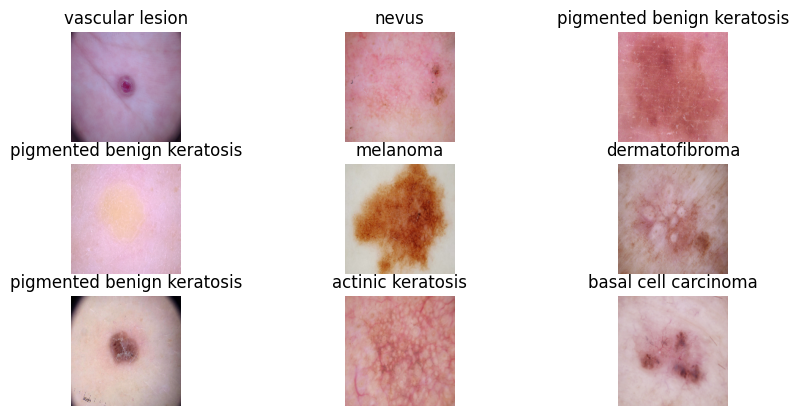

In [ ]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
#the train_ds dataset yields a tuple (images, labels)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(6, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Model Building & training

Create the model
Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

#Base Model 1:

Rescaling Layer

2D Convolution Layer

Max Pooling Layer

2D Convolution Layer

Max Pooling Layer

2D Convolution Layer

Max Pooling Layer

Flattening layer

Dense Layer

Dense Layer

In [ ]:
### Your code goes here
input_shape = (180,180,3)
activ = 'relu'
num_classes=9
 # Rescaling - A preprocessing layer which rescales input values to a new range. (Here its diving by 1/255)
#preprocessing_layers = [
 #   tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3))
#]
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))

#2D convolution layer
model.add(Conv2D(16, kernel_size=(3, 3), padding='same',activation='relu', input_shape=input_shape))
#Maxpooling Layer
#Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

#Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
##Flattens the input. Does not affect the batch size.
model.add(Flatten())

#fully connected layer
#A hidden layer in which each node is connected to every node in the subsequent hidden layer.
#A fully connected layer is also known as a dense layer.
model.add(Dense(128, activation='relu'))

#Dense is the only actual network layer in that model. A Dense layer feeds all outputs from the previous layer to all its neurons, each neuron providing one output to the next layer.
#It's the most basic layer in neural networks. A Dense(10) has ten neurons. A Dense(512) has 512 neurons.
#Dense implements the operation: output = activation(dot(input, kernel)
#Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
model.add(Dense(num_classes))
## Number of classes is 9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#Compile the model

Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
# View the summary of all layers
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

#Train the model

In [ ]:
epochs = 20
batch_size = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 443s 2s/step - loss: 1.9416 - accuracy: 0.2779 - val_loss: 1.8089 - val_accuracy: 0.3378
Epoch 2/20
56/56 [==============================] - 1s 22ms/step - loss: 1.6642 - accuracy: 0.3884 - val_loss: 1.8276 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.6896 - accuracy: 0.4023 - val_loss: 1.5464 - val_accuracy: 0.4609
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.4210 - accuracy: 0.5134 - val_loss: 1.4304 - val_accuracy: 0.5123
Epoch 5/20
56/56 [==============================] - 1s 21ms/step - loss: 1.3243 - accuracy: 0.5352 - val_loss: 1.4517 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 21ms/step - loss: 1.2442 - accuracy: 0.5586 - val_loss: 1.3760 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.1191 - accuracy: 0.5965 - val_loss: 1.3615 - val_accuracy: 0.5168
Epoch 8/20
56


##Visualizing training results

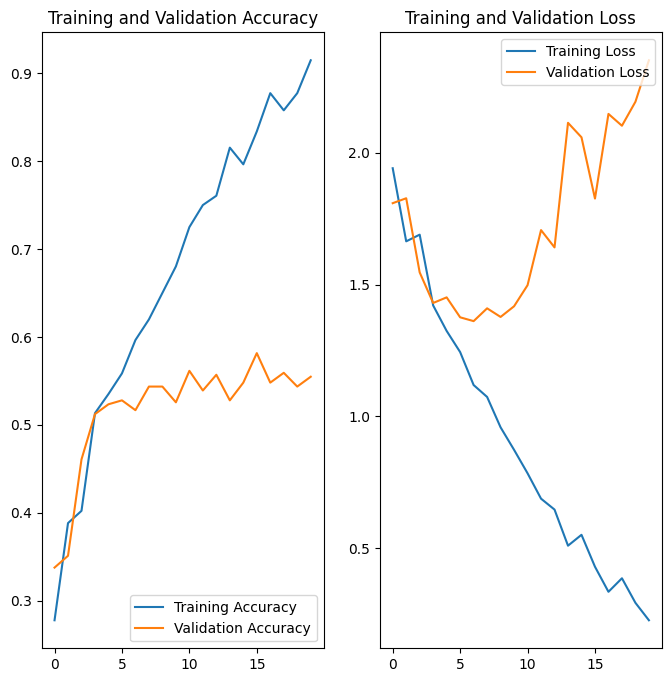

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model seems to overfits hence we can try implementing Regularisation.

Neural networks that are usually large, complex models with tens of thousands of parameters have a tendency to overfit the training data. As with many other ML models, regularisation is a common technique used in neural networks to address this problem. Let's now take a look at a popular regularisation technique used for neural networks called dropouts.

The main purpose of using dropouts is to reduce overfitting. Sometimes, a model trains on the training data set and its weights and biases converge to very specific values, values that are ideal for only the training data set. Adding a dropout layer to the neural network helps to break that specific combination of weights and biases.

#Model 2 : Base Model + Dropout Layer
We changed the above model to include a Dropput layer before every Convolution Layer with Dropout ratio .2
The final activation function was changed to softmax.
The new model consisted of:
- Rescaling Layer
- 2D Convolution Layer
- Max Pooling Layer
- Drop Out Layer
- 2D Convolution Layer
- Max Pooling Layer
- Drop Out Layer
- 2D Convolution Layer
- Max Pooling Layer
- Drop Out Layer
- Flattening layer
- Dense Layer
- Dense Layer

In [ ]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),

  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Conv2D(128, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Conv2D(256, 3, padding='same', activation='relu'),
  #We slide over the feature map and extract tiles of a specified size.
  layers.MaxPooling2D(),
  #Advantages of downsampling - Decreased size of input for upcoming layers, Works against overfitting

  layers.Dropout(0.2), #Since the model is overfitting lets see how it performs by adding a dropout layer

  layers.Flatten(),
  #Flattening - Convert into 1D feature vector.  Flattens all its structure to create a single long feature vector
  layers.Dense(128, activation='relu'),
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
  layers.Dense(num_classes,activation='softmax')
  #Dense Layer - A dense layer represents a matrix vector multiplication.  each input node is connected to each output node.
])


In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 90, 90, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [ ]:

epochs = 20
batch_size = 32
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 13s 142ms/step - loss: 2.5094 - accuracy: 0.1842 - val_loss: 2.0398 - val_accuracy: 0.2058
Epoch 2/20
56/56 [==============================] - 7s 119ms/step - loss: 2.0233 - accuracy: 0.2143 - val_loss: 1.9913 - val_accuracy: 0.2864
Epoch 3/20
56/56 [==============================] - 7s 117ms/step - loss: 1.9421 - accuracy: 0.2600 - val_loss: 1.9276 - val_accuracy: 0.3177
Epoch 4/20
56/56 [==============================] - 7s 119ms/step - loss: 1.7581 - accuracy: 0.3672 - val_loss: 1.7051 - val_accuracy: 0.4004
Epoch 5/20
56/56 [==============================] - 7s 118ms/step - loss: 1.5727 - accuracy: 0.4425 - val_loss: 1.5352 - val_accuracy: 0.4430
Epoch 6/20
56/56 [==============================] - 7s 119ms/step - loss: 1.5258 - accuracy: 0.4576 - val_loss: 1.5020 - val_accuracy: 0.4966
Epoch 7/20
56/56 [==============================] - 7s 119ms/step - loss: 1.4055 - accuracy: 0.5056 - val_loss: 1.4929 - val_accuracy: 0.4922
Epoch 8/20
56/56

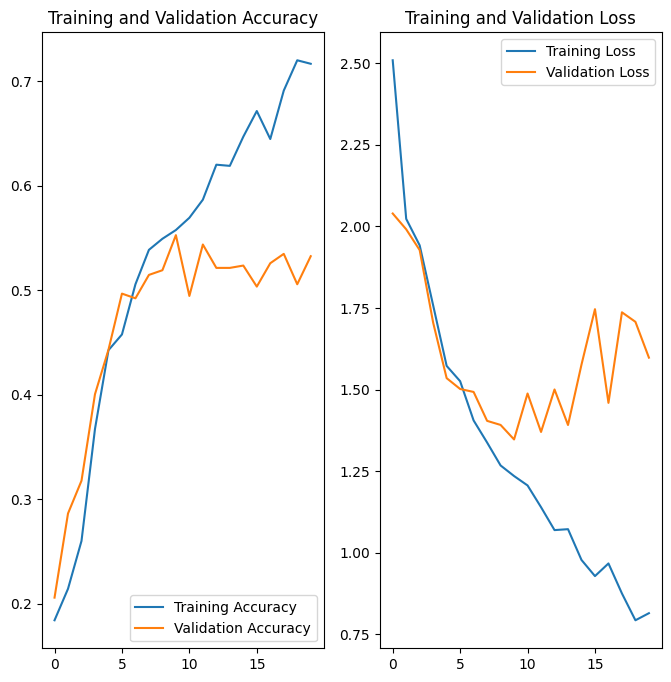

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

We see that it reduced the gap between training and validation accuracy but the validation accuracy is still low, let's check now if augmentation helps.

#Choose an Augmentation Strategy

In [ ]:
# data augmentation: a technique to increase the diversity of your training set by applying random (but realistic) transformations,
# such as image rotation etc. We will be using Keras preprocessing layers to do this such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomTranslation(1,.5,fill_mode="reflect",interpolation="bilinear",seed=None,fill_value=0.0),
    layers.experimental.preprocessing.RandomCrop(img_height,img_width),
  ]
)

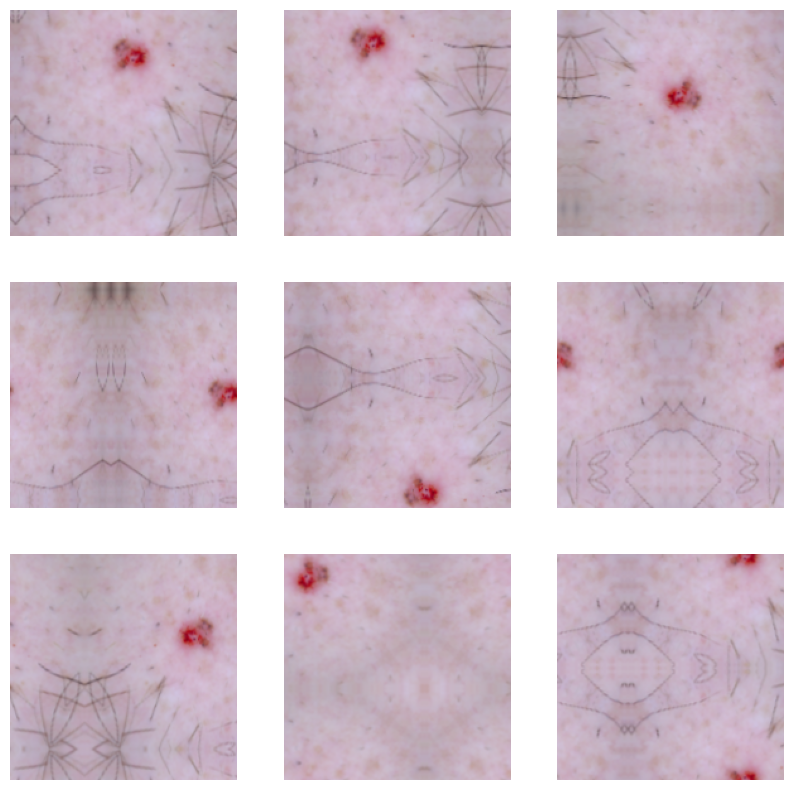

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")


#Model Building & training on the augmented data

In [ ]:
num_classes = 9

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 129ms/step - loss: 3.0313 - accuracy: 0.1970 - val_loss: 2.0486 - val_accuracy: 0.2081
Epoch 2/20
56/56 [==============================] - 7s 132ms/step - loss: 2.0183 - accuracy: 0.1892 - val_loss: 2.0130 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 7s 123ms/step - loss: 1.9857 - accuracy: 0.2249 - val_loss: 1.9200 - val_accuracy: 0.3154
Epoch 4/20
56/56 [==============================] - 7s 130ms/step - loss: 1.8990 - accuracy: 0.2891 - val_loss: 1.8613 - val_accuracy: 0.2975
Epoch 5/20
56/56 [==============================] - 7s 123ms/step - loss: 1.8787 - accuracy: 0.2919 - val_loss: 1.8085 - val_accuracy: 0.3266
Epoch 6/20
56/56 [==============================] - 7s 130ms/step - loss: 1.8410 - accuracy: 0.3041 - val_loss: 1.7952 - val_accuracy: 0.3602
Epoch 7/20
56/56 [==============================] - 7s 122ms/step - loss: 1.7522 - accuracy: 0.3404 - val_loss: 1.7218 - val_accuracy: 0.3602
Epoch

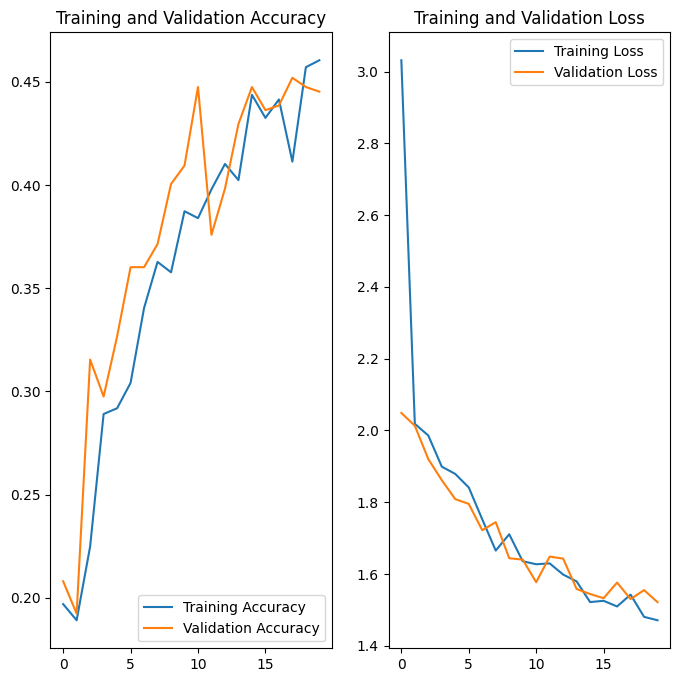

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

That made huge difference, the model does not overfit anymore but the training accuracy is gone very low meaning it needs more data to train.

#Find the distribution of classes in the training dataset.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
1,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
2,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
3,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
4,/content/drive/MyDrive/CNN_assignment/Skin can...,actinic keratosis
...,...,...
2234,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2235,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2236,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion
2237,/content/drive/MyDrive/CNN_assignment/Skin can...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


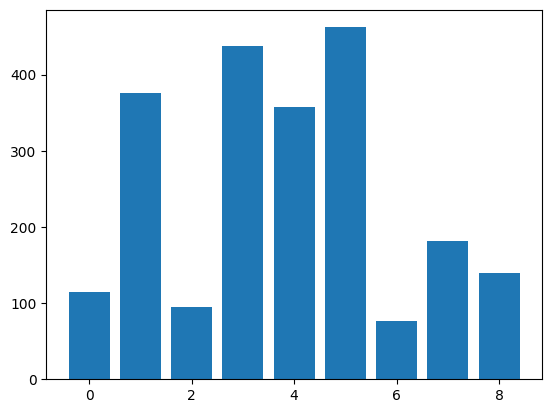

In [ ]:

from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


<BarContainer object of 9 artists>

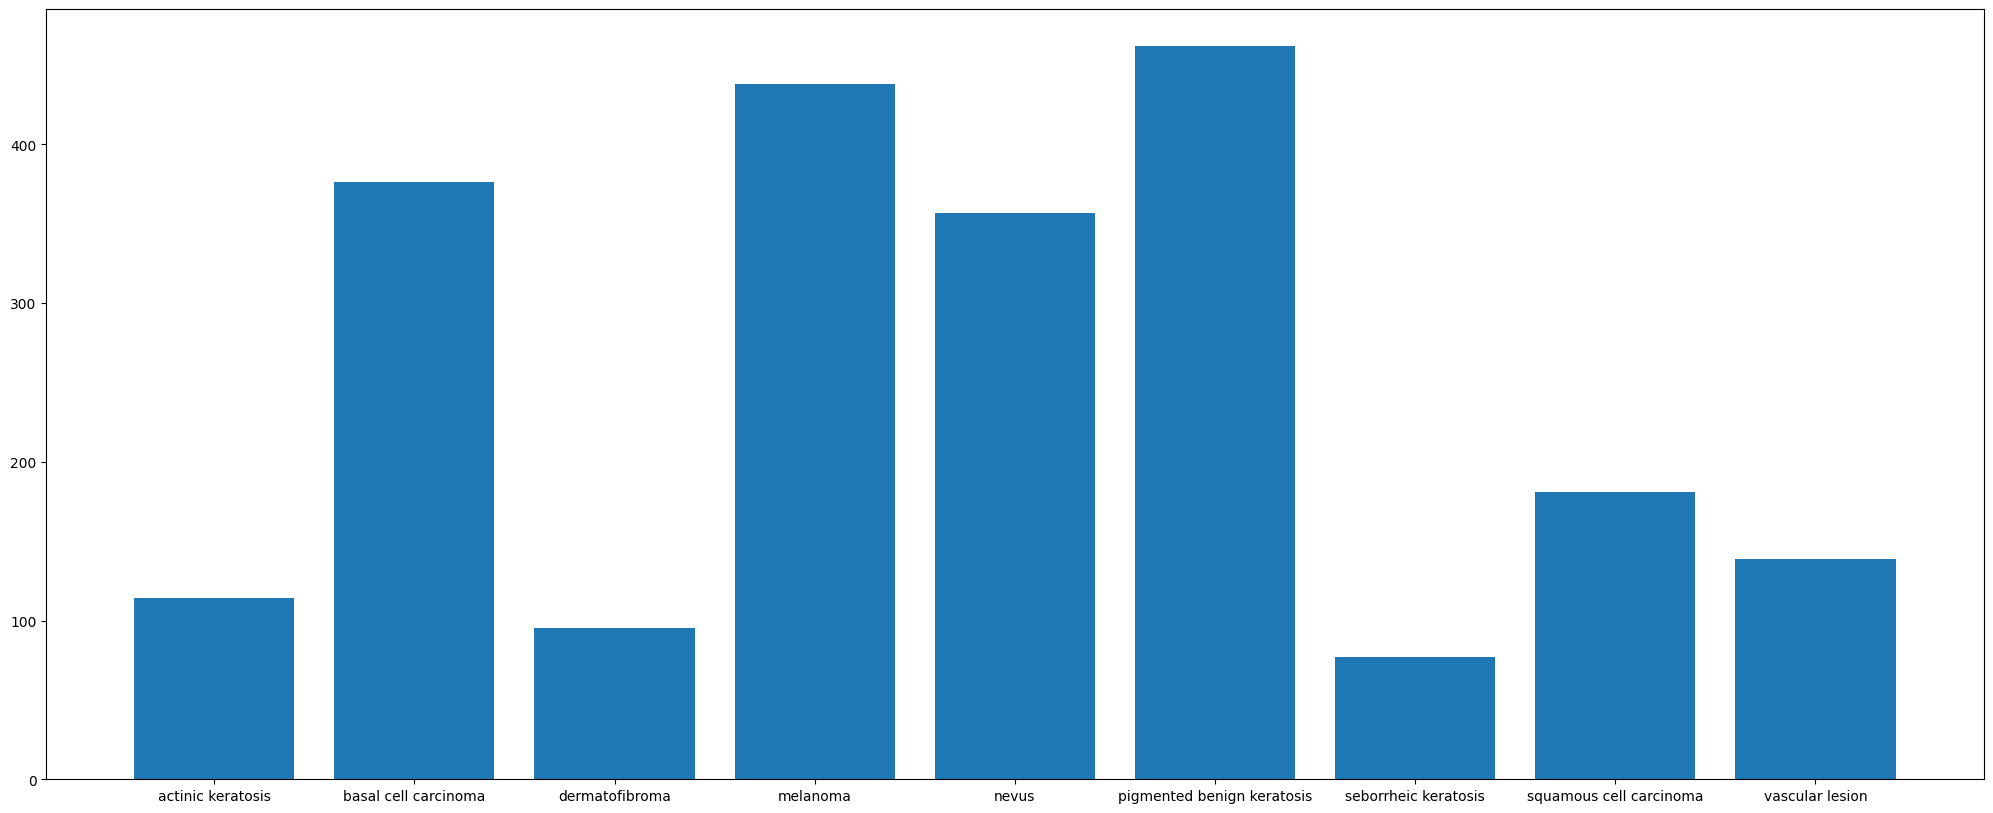

In [ ]:
count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

We see that there is a significant imbalance among the classes and hence we need to resolve this.

# Handling class imbalance

In [ ]:
!pip install Augmentor

In [ ]:
path_to_training_dataset="/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
    p.process()

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFE7C3217B0>: 100%|██████████| 500/500 [00:23<00:00, 21.17 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFE7C308220>: 100%|██████████| 114/114 [00:03<00:00, 34.59 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFEEFF5F7F0>: 100%|██████████| 500/500 [00:18<00:00, 26.38 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFEA41034F0>: 100%|██████████| 376/376 [00:14<00:00, 26.32 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFF7022D360>: 100%|██████████| 500/500 [00:18<00:00, 27.01 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFF21322DD0>: 100%|██████████| 95/95 [00:03<00:00, 29.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7BFF91458C70>: 100%|██████████| 500/500 [01:32<00:00,  5.41 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BFEEFE25BD0>: 100%|██████████| 438/438 [01:16<00:00,  5.70 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFF70657C70>: 100%|██████████| 500/500 [01:29<00:00,  5.60 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFEEFC00400>: 100%|██████████| 357/357 [01:00<00:00,  5.86 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFEFE183EE0>: 100%|██████████| 500/500 [00:18<00:00, 27.00 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7BFEEFD370D0>: 100%|██████████| 462/462 [00:17<00:00, 25.98 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BFF89DA4370>: 100%|██████████| 500/500 [00:40<00:00, 12.27 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7BFF21322DD0>: 100%|██████████| 77/77 [00:07<00:00, 10.24 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFF21320B20>: 100%|██████████| 500/500 [00:19<00:00, 25.60 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFF70362B00>: 100%|██████████| 181/181 [00:06<00:00, 29.01 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train//vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7BFEEFD37130>: 100%|██████████| 500/500 [00:18<00:00, 26.58 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C0007A0CD30>: 100%|██████████| 139/139 [00:04<00:00, 28.99 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

6739


##Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028990.jpg_5a5ec657-4961-4a9d-a4a4-f6784a0822be.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0026457.jpg_8607b018-a690-4256-8d1a-1f085b692b11.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030143.jpg_e34e5c22-bf70-44e6-9e65-ce98a4407b90.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029930.jpg_ff70a82f-d4cd-45cb-9010-1eaa71f939ff.jpg',
 '/content/drive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic kera

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new


['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))


In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-47-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    1424
melanoma                      1376
basal cell carcinoma          1252
nevus                         1214
squamous cell carcinoma        862
vascular lesion                778
actinic keratosis              728
dermatofibroma                 690
seborrheic keratosis           654
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8978 files belonging to 9 classes.
Using 7183 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 8978 files belonging to 9 classes.
Using 1795 files for validation.


#Model Building & training on the balanced data
## Final model - Model  on Balanced data

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(num_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


225/225 [==============================] - 61s 80ms/step - loss: 1.3184 - accuracy: 0.5320 - val_loss: 4.1780 - val_accuracy: 0.1521
Epoch 2/20
225/225 [==============================] - 10s 43ms/step - loss: 0.7307 - accuracy: 0.7536 - val_loss: 2.0631 - val_accuracy: 0.3682
Epoch 3/20
225/225 [==============================] - 9s 42ms/step - loss: 0.4257 - accuracy: 0.8597 - val_loss: 0.6524 - val_accuracy: 0.7838
Epoch 4/20
225/225 [==============================] - 10s 42ms/step - loss: 0.2265 - accuracy: 0.9311 - val_loss: 1.1720 - val_accuracy: 0.6212
Epoch 5/20
225/225 [==============================] - 10s 43ms/step - loss: 0.1522 - accuracy: 0.9488 - val_loss: 0.7299 - val_accuracy: 0.7582
Epoch 6/20
225/225 [==============================] - 9s 42ms/step - loss: 0.1312 - accuracy: 0.9545 - val_loss: 1.5842 - val_accuracy: 0.5705
Epoch 7/20
225/225 [==============================] - 10s 43ms/step - loss: 0.0899 - accuracy: 0.9690 - val_loss: 0.5288 - val_accuracy: 0.8306
Epoch

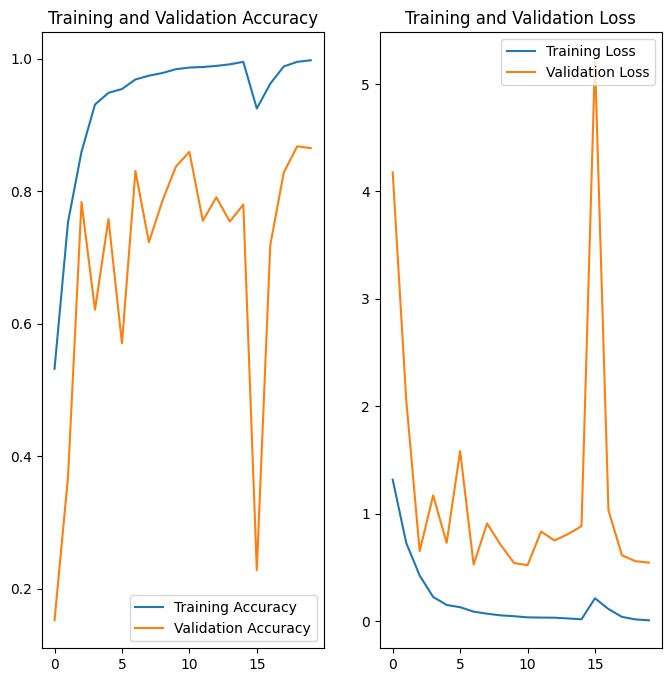

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Yes Class rebalance and batch normalization helped and the model shows good accuracy and is not underfitting or overfitting.

#Result Analysis:

- Problem of overfitting was reduced by adding dropout layers but not to a huge extent.
- Problem of overfitting was greatly reduced by real time augmentation. But the accuracy both training and validation went very low.
- To increase the training accuracy, Image data generator was used for Augmentation which didnt work.
- After checking if the data was imbalanced, it was found that there was class imbalance in the data and hence Augmentor was used to increase



the training dataset size for classes having less samples. This along with batch normalisation layers gave very good result and the training accuracy was seen as 99% while the validation accuracy was seen 86%